In [1]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as mt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()
import zipfile

In [2]:
with zipfile.ZipFile("C:/Users/Harshit/Downloads/titanic.zip") as x:
    with x.open("train.csv") as v:
        fd = ps.read_csv(v)

In [3]:
fd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
fd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
for x in fd:
    if x in fd:
        print(x)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [5]:
for x in fd:
    print (fd[x].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtyp

In [6]:
fd.shape

(891, 12)

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
fd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
fd.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [124]:
fd.isnull().sum()/len(fd)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
fd.drop(columns=["Cabin"],inplace=True)

In [126]:
fd.isnull().sum()/len(fd)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [127]:
fd.Sex.unique()

array(['male', 'female'], dtype=object)

In [128]:
fd.columns.to_series().groupby(fd.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Embarked']}

In [129]:
# Checking Target Variable Distribution
fd.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
fd['Fare'] = ps.to_numeric(fd['Fare'],errors='coerce')
fd['Fare'] = fd['Fare'].astype("float")

In [131]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [132]:
fd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
#Filling Missing Values
fd["Age"].fillna(fd["Age"].mode()[0], inplace=True)

In [9]:
#Filling Missing Values
fd["Embarked"].fillna(fd["Embarked"].mode()[0], inplace=True)

In [10]:
fd.drop(columns=["PassengerId"],inplace=True)

In [11]:
fd.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked    False
dtype: bool

In [137]:
fd.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

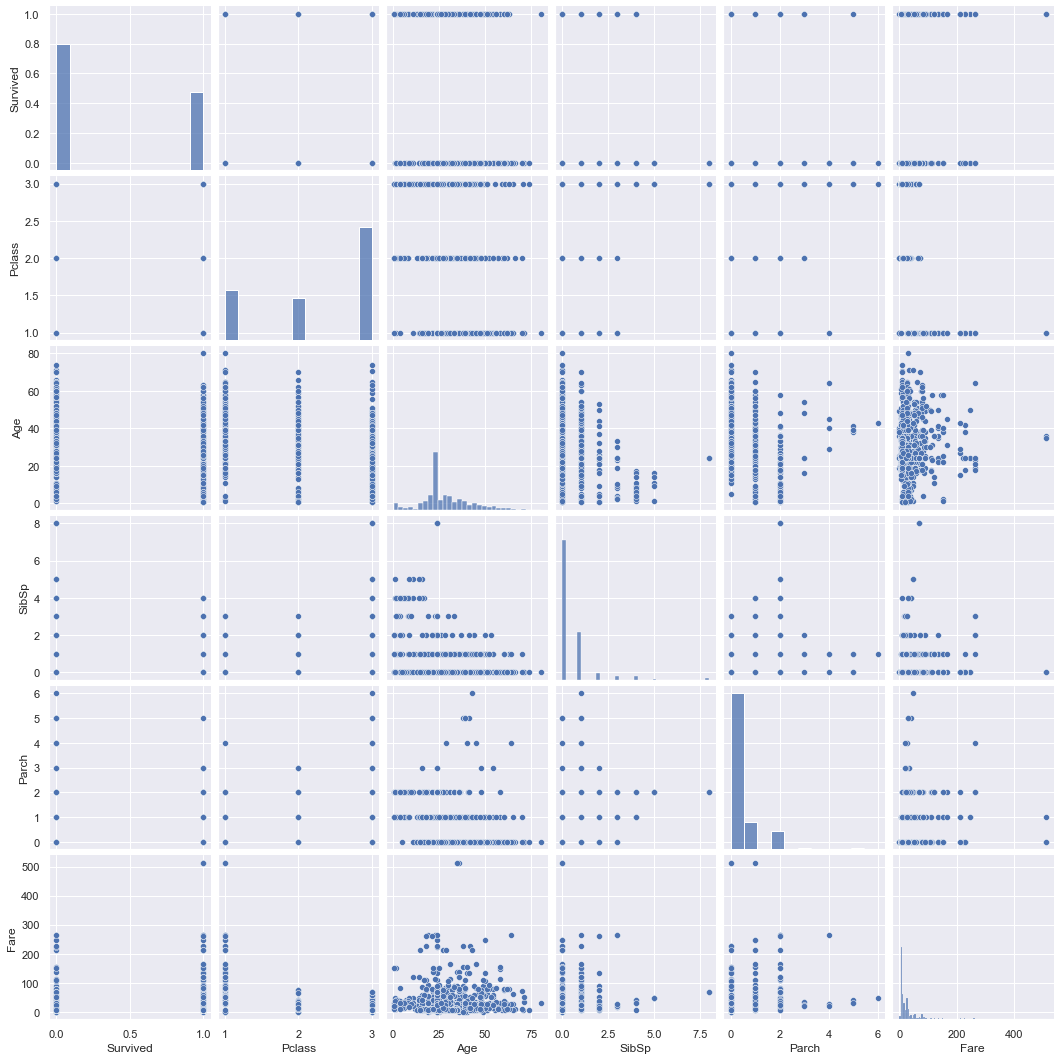

In [77]:
sns.pairplot(fd)

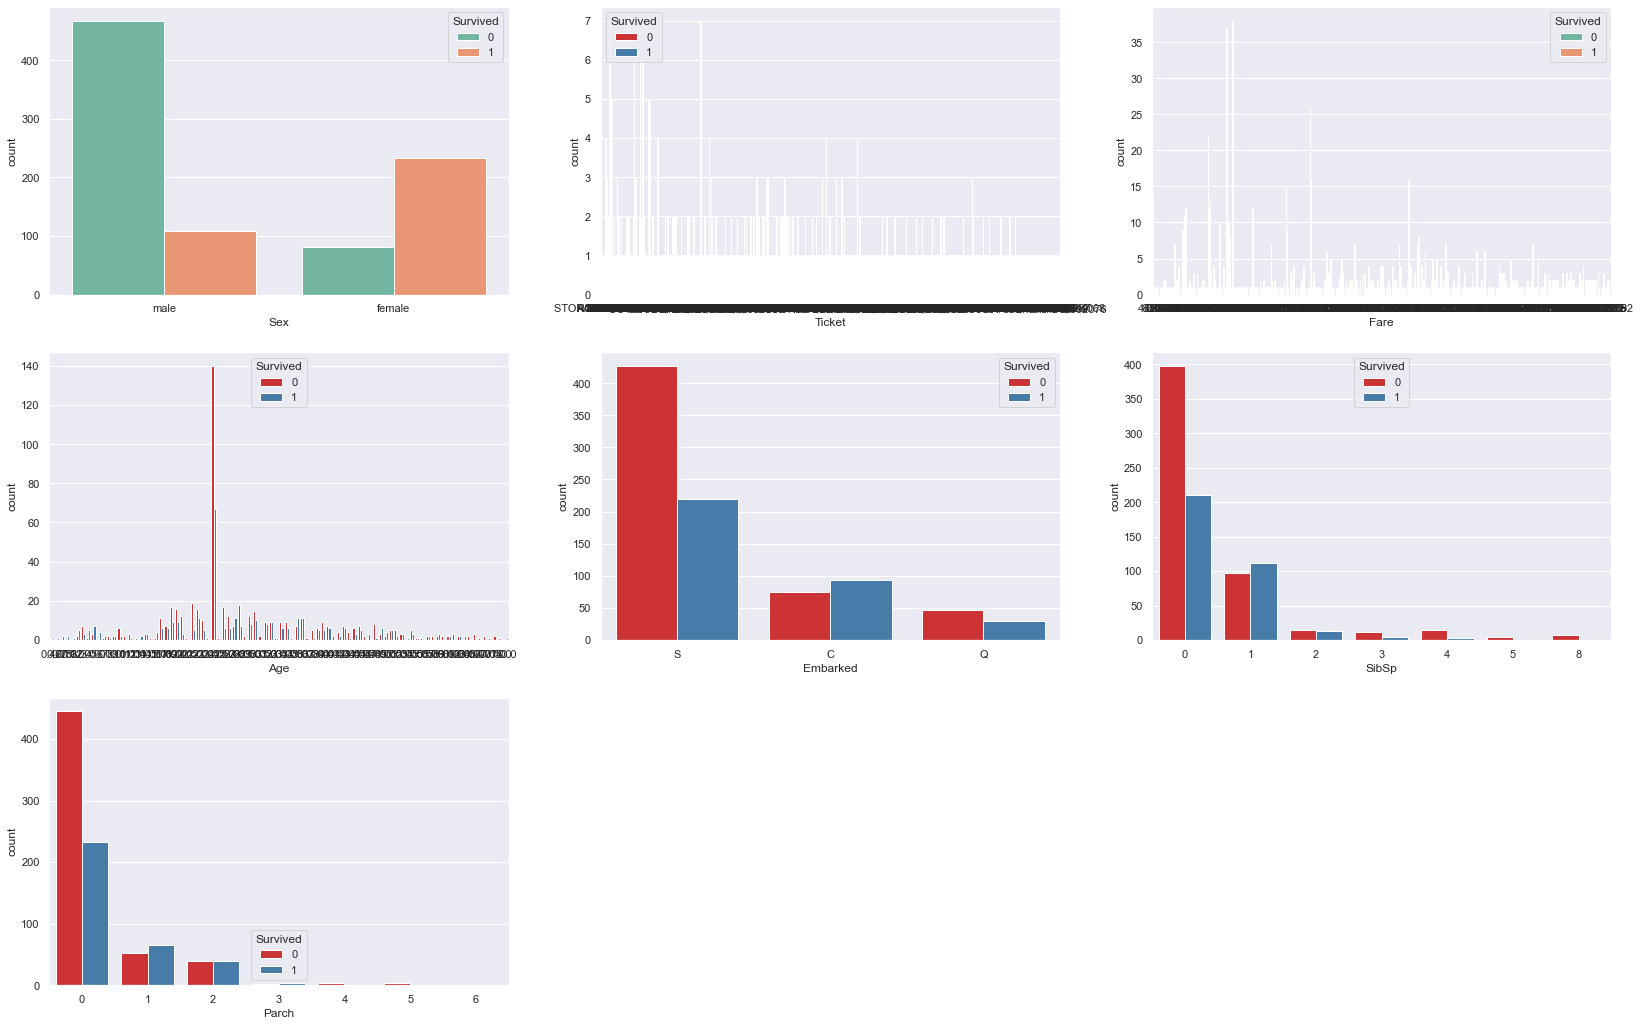

In [78]:
mt.figure(figsize= (28,18))
mt.subplot(3,3,1)
sns.countplot(x= "Sex",data=fd, hue='Survived',palette="Set2")
mt.subplot(3,3,2)
sns.countplot(x= "Ticket",data=fd, hue='Survived',palette="Set1")
mt.subplot(3,3,3)
sns.countplot(x= "Fare",data=fd, hue='Survived',palette="Set2")
mt.subplot(3,3,4)
sns.countplot(x= "Age",data=fd, hue='Survived',palette="Set1")
mt.subplot(3,3,5)
sns.countplot(x= "Embarked",data=fd, hue='Survived',palette="Set1")
mt.subplot(3,3,6)
sns.countplot(x= "SibSp",data=fd, hue='Survived',palette="Set1")
mt.subplot(3,3,7)
sns.countplot(x= "Parch",data=fd, hue='Survived',palette="Set1")
mt.show()

<AxesSubplot:>

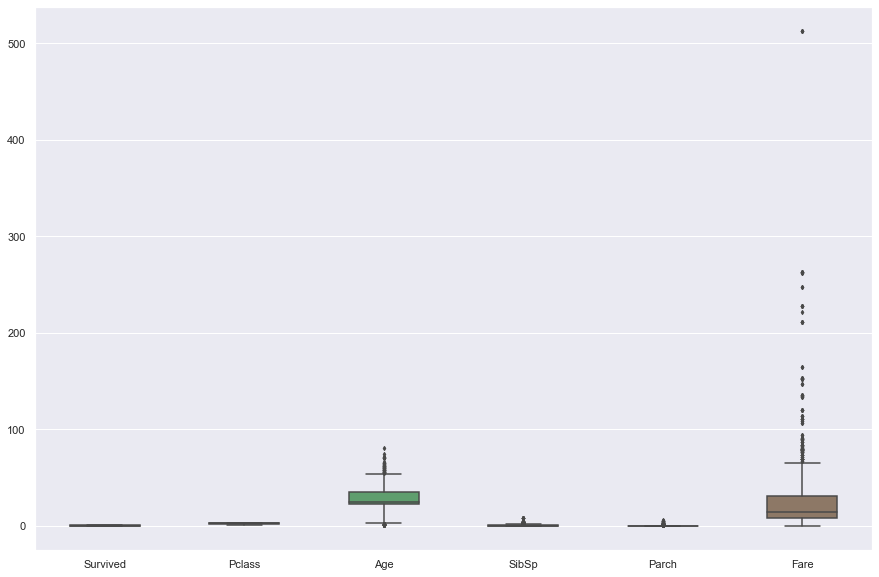

In [79]:
fig, ax = mt.subplots(figsize=(15,10))
sns.boxplot(data=fd, width= 0.5,ax=ax,  fliersize=3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

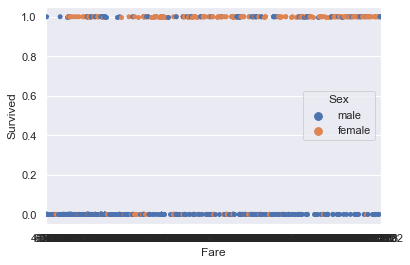

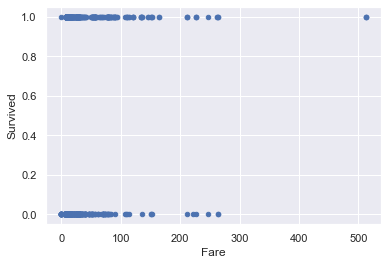

In [80]:
# Here we are getting on basis of Sex majority of male dies.
# That's what happened with us🙂
sns.stripplot(data=fd,x="Fare",y="Survived",hue="Sex")
fd.plot(kind="scatter",x="Fare",y="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Count'>

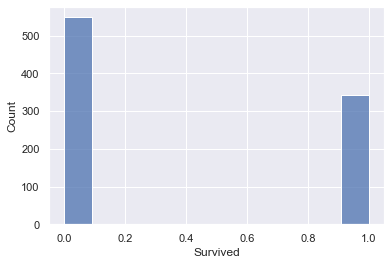

In [81]:
sns.histplot(data=fd,x="Survived")

<AxesSubplot:xlabel='Age', ylabel='Survived'>

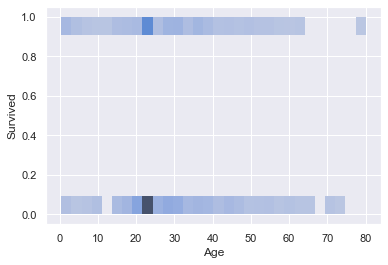

In [12]:
sns.histplot(data=fd,x="Age",y="Survived")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

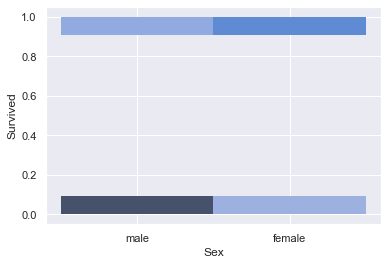

In [13]:
sns.histplot(data=fd,x="Sex",y="Survived")

In [14]:
a=fd.groupby("Survived")
a

In [15]:
a.get_group(0)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
a.get_group(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [20]:
fd.isnull().sum()/len(fd)*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

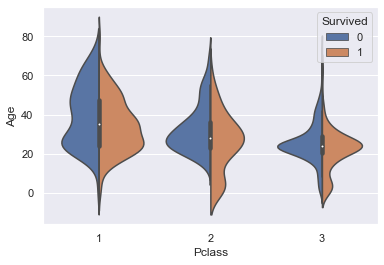

In [21]:
# here we can see that majority of people dies in range of age between 20-50
sns.violinplot(data=fd,x="Pclass",y="Age",hue="Survived",split=True)

In [30]:
ps.pivot_table(fd,index=["Survived","Sex"],values=["Pclass","Age"],aggfunc="count")

Age  Pclass
Survived Sex             
0        0     81      81
         1    468     468
1        0    233     233
         1    109     109

In [31]:
ps.pivot_table(fd,index=["Embarked","Survived"],values=["Parch"],aggfunc="count")

Parch
Embarked Survived       
0        0            75
         1            93
1        0            47
         1            30
2        0           427
         1           219

In [142]:
fd.isnull().sum()/len(fd)*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

<AxesSubplot:>

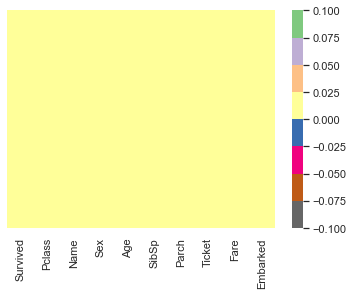

In [143]:
sns.heatmap(fd.isnull(),yticklabels=False,cmap='Accent_r')


In [144]:
fd.columns.to_series().groupby(fd.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Embarked']}

In [145]:
from sklearn.preprocessing import LabelEncoder
cat_cols=["Sex","Pclass","Parch","SibSp","Embarked"]
le=LabelEncoder()
for x in cat_cols:
    fd[x]=le.fit_transform(fd[x])

In [146]:
fd.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [24]:
fd.drop(['Name','Ticket'],axis=1,inplace=True)

In [25]:
fd.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
fd.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
fd.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
fd.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [152]:
fd.shape

(891, 8)

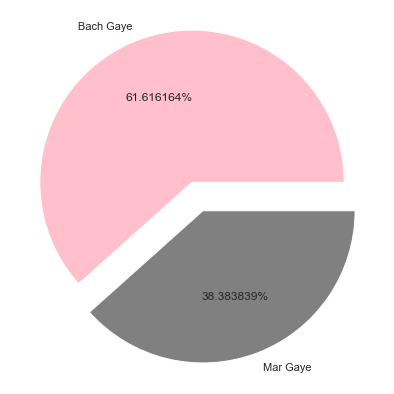

In [187]:
mt.figure(figsize= (12,7))
labels=["Bach Gaye","Mar Gaye"]
explode = [0.1, 0.1]
colors=["Pink","Grey"]
sizes=fd.Survived.value_counts().values
mt.pie(sizes,explode,labels,autopct='%0f%%',colors=colors)
mt.show()


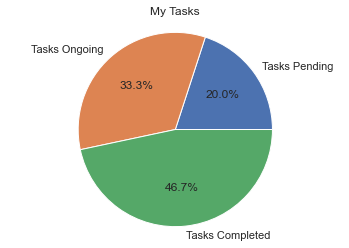

In [189]:
my_data = [300, 500, 700]
my_labels = 'Tasks Pending', 'Tasks Ongoing', 'Tasks Completed'
mt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
mt.title('My Tasks')
mt.axis('equal')
mt.show()

In [154]:
#fd.drop(columns=["Ticket"],inplace=True)

In [155]:
fd.head()
a=fd.columns
a

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [156]:
scaler=MinMaxScaler()

In [157]:
fd[a]=scaler.fit_transform(fd[a])
fd

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.166667,0.000000,0.014151,1.0
1,1.0,0.0,0.0,0.472229,0.166667,0.000000,0.139136,0.0
2,1.0,1.0,0.0,0.321438,0.000000,0.000000,0.015469,1.0
3,1.0,0.0,0.0,0.434531,0.166667,0.000000,0.103644,1.0
4,0.0,1.0,1.0,0.434531,0.000000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,1.0,0.334004,0.000000,0.000000,0.025374,1.0
887,1.0,0.0,0.0,0.233476,0.000000,0.000000,0.058556,1.0
888,0.0,1.0,0.0,0.296306,0.166667,0.333333,0.045771,1.0
889,1.0,0.0,1.0,0.321438,0.000000,0.000000,0.058556,0.0


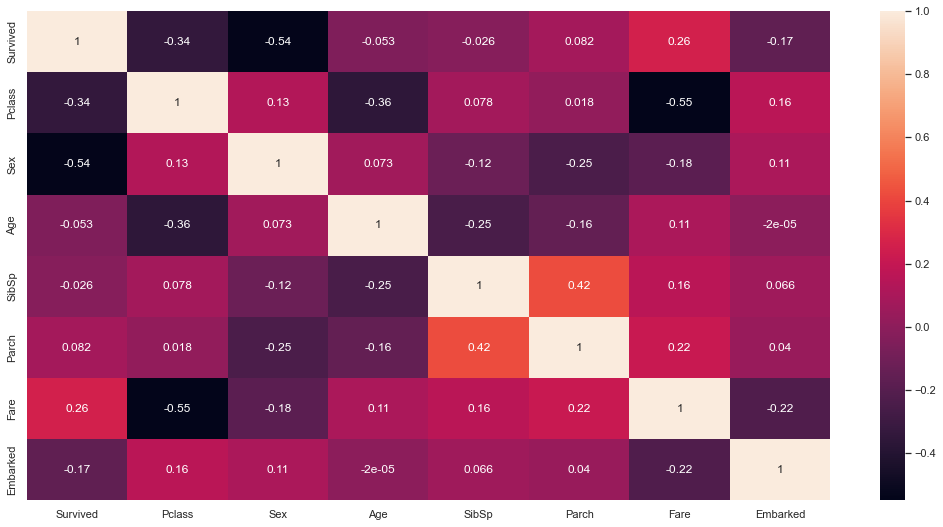

In [158]:
# checking correlation with y variable
mt.figure(figsize=(18,9))
sns.heatmap(fd.corr(),annot=True)
mt.show()

In [159]:
X = fd.drop(columns = ['Survived'])
y = fd['Survived']

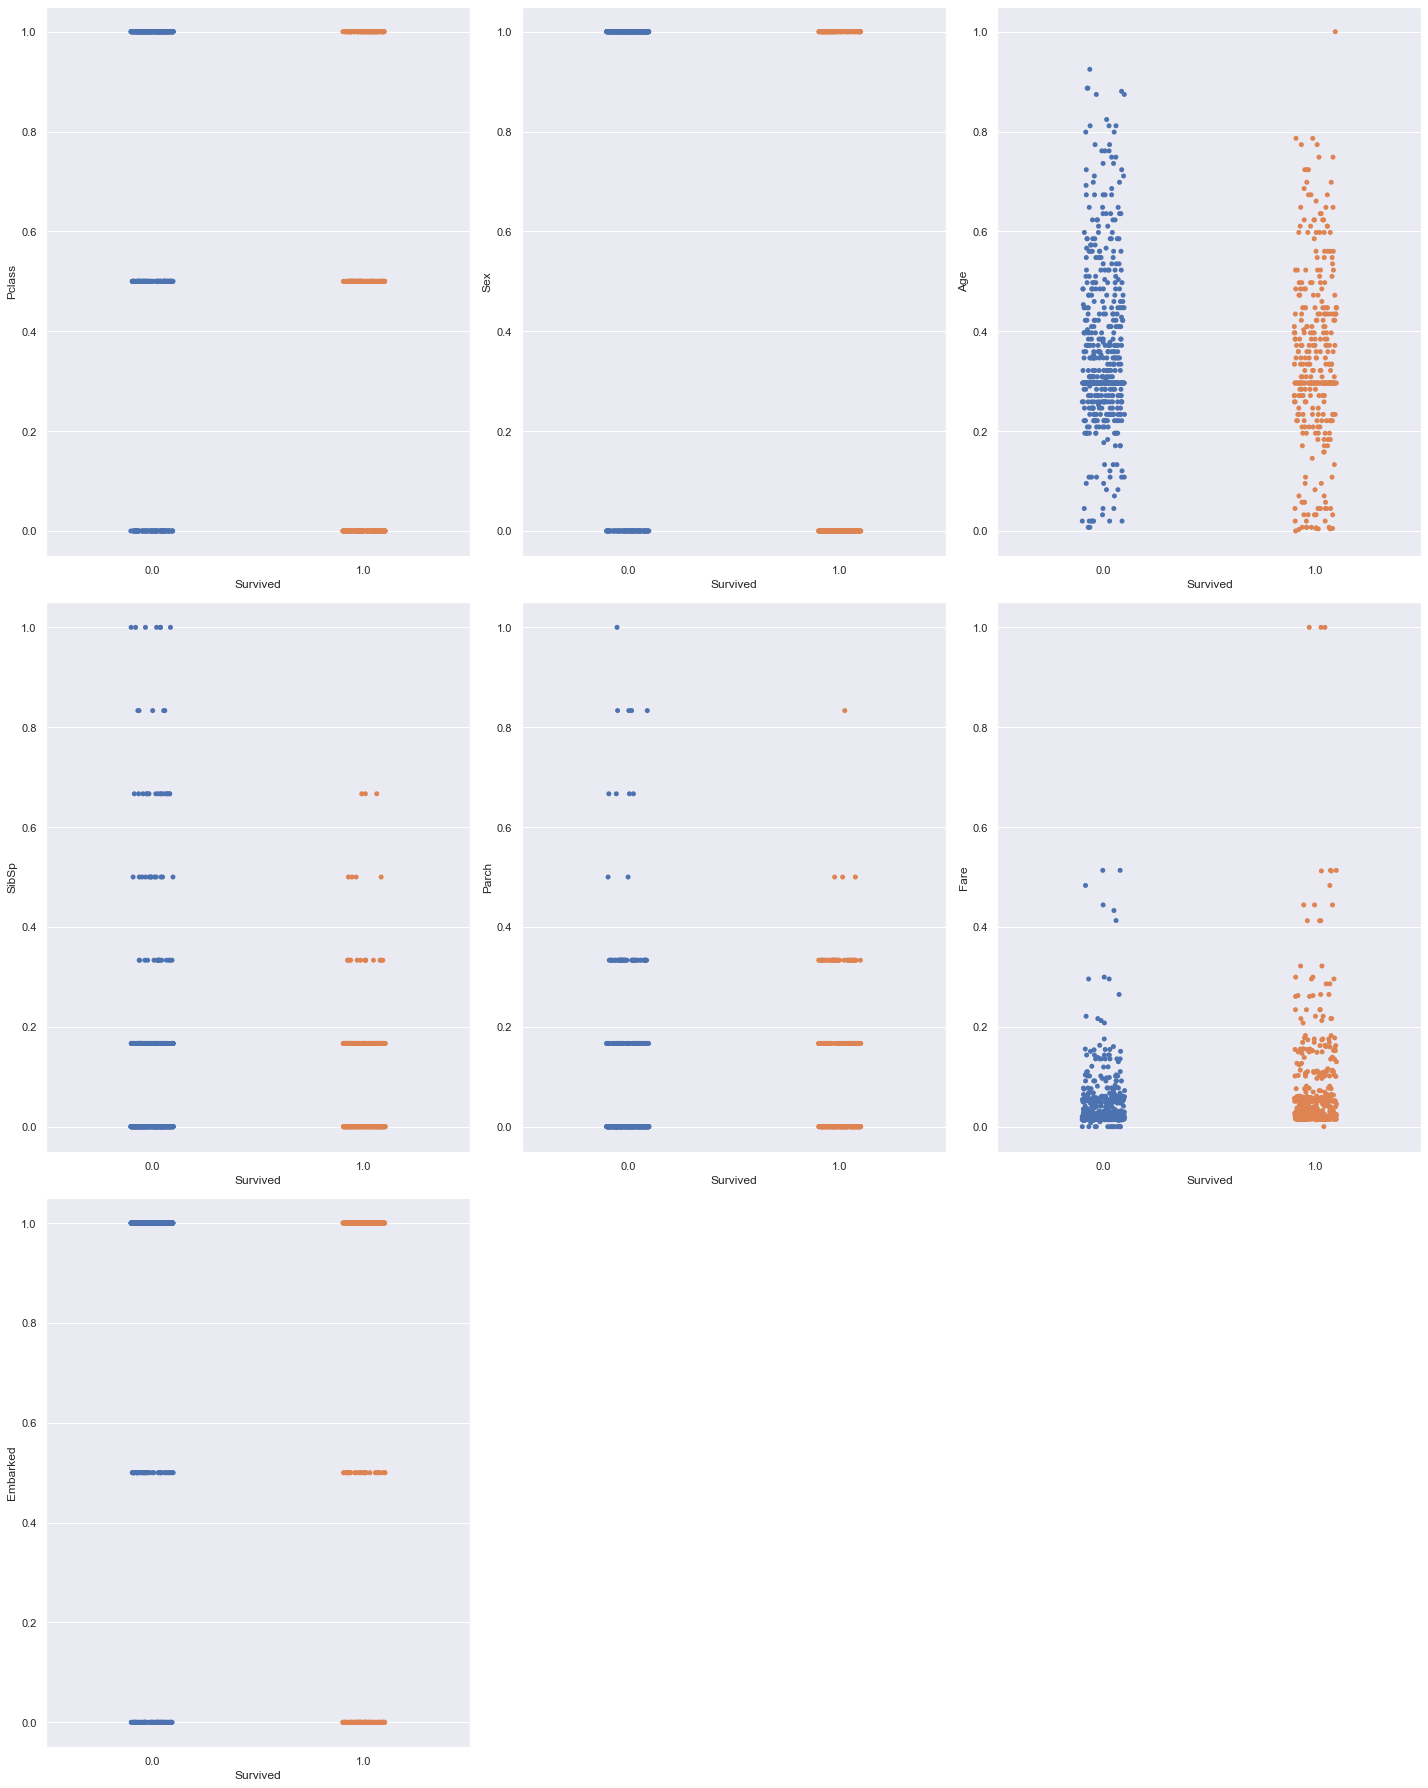

In [160]:
mt.figure(figsize=(20,25))
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = mt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
mt.tight_layout()

In [161]:
vif = ps.DataFrame()
vif["vif"] = [variance_inflation_factor(fd,i) for i in range(fd.shape[1])]
vif["Features"] = fd.columns

#let's check the values
vif

,vif,Features
0,1.856651,Survived
1,3.531332,Pclass
2,3.460741,Sex
3,4.363849,Age
4,1.631417,SibSp
5,1.618254,Parch
6,1.990609,Fare
7,4.554427,Embarked


In [162]:
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [163]:
X_scaled

array([[ 0.82737724,  0.73769513, -0.49779327, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.71504807, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.19458293, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.3461881 , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.19458293, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.26023257, ..., -0.47367361,
        -0.49237783, -0.67817453]])

# Train Data

In [164]:
X=fd.drop('Survived',axis=1)
y=fd['Survived']

In [165]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state =1)

In [166]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [167]:
logmodel=LogisticRegression()

In [168]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [169]:
prediction=logmodel.predict(x_test)

In [170]:
from sklearn.metrics import classification_report

In [171]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.86      0.83       128\n         1.0       0.79      0.73      0.76        95\n\n    accuracy                           0.80       223\n   macro avg       0.80      0.79      0.80       223\nweighted avg       0.80      0.80      0.80       223\n'

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
confusion_matrix=confusion_matrix(y_test,prediction)
confusion_matrix

array([[110,  18],
       [ 26,  69]], dtype=int64)

In [174]:
true_positive =confusion_matrix[0][0]
false_positive =confusion_matrix[0][1]
false_negative =confusion_matrix[1][0]
true_negative =confusion_matrix[1][1]
print('True-Negative=',true_negative)
print('True-Positive=',true_positive)
print('False-Negative=',false_negative)
print('False-Positive=',false_positive)

True-Negative= 69
True-Positive= 110
False-Negative= 26
False-Positive= 18


In [175]:
from sklearn.metrics import accuracy_score

In [176]:
y_pred = log_reg.predict(x_test)

In [177]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8026905829596412

In [178]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.859375

In [179]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8088235294117647

In [180]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8333333333333333

In [181]:
#Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7928453947368421

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

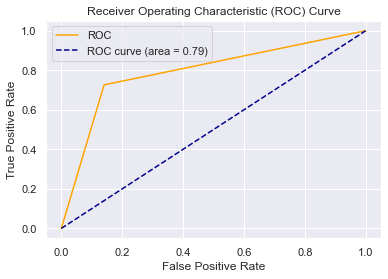

In [183]:
mt.plot(fpr, tpr, color='orange', label='ROC')
mt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
mt.xlabel('False Positive Rate')
mt.ylabel('True Positive Rate')
mt.title('Receiver Operating Characteristic (ROC) Curve')
mt.legend()
mt.show()

In [29]:
fd.shape

(891, 8)

In [33]:
fd.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')